## My Instagram "likes" Report
By Spencer Murphy


**The purpose of this report is to analyze the content that I have liked over time through my personal Instagram account, using data that was downloaded via Instagram**

Using Pandas and various DataFrame methods, I was able to graph the distribution density of my data along with the proportion of likes by account. This data led me to the result of a question that had been lurking in the back of my mind for some time now, the question being: "which profiles that I follow do most of my likes go to?" On this account, I only follow friends of mine, so none of my likes will have gone to a corportation or a big-time influencer or something of that nature. Below I will explain the strucure of my dataset, my work thus far, and what the results of this analysis mean. 

### Loading my data file and examining my likes

This first bit of code allows me access to libraries that contain some of the functions that I needed to utilize:



In [56]:
from matplotlib import pyplot as plt
import json 
from datetime import datetime as dt
import seaborn as sns

This block of code loads in my data as a typical json file (beware the crude profile names):

In [38]:
with open(r'C:\Users\Spencer\Downloads\dad_murphy_20210208\likes\liked_posts.json') as inst:
    data = json.load(inst)
data


{'likes_media_likes': [{'title': 'eric_noonan_',
   'media_list_data': [],
   'string_list_data': [{'href': '',
     'value': 'ð\x9f\x91\x8d',
     'timestamp': 1612125162}]},
  {'title': 'urlocalbitch_',
   'media_list_data': [],
   'string_list_data': [{'href': '',
     'value': 'ð\x9f\x91\x8d',
     'timestamp': 1611331367}]},
  {'title': 'lif3isablur',
   'media_list_data': [],
   'string_list_data': [{'href': '',
     'value': 'ð\x9f\x91\x8d',
     'timestamp': 1611074079}]},
  {'title': 'dad_murphy',
   'media_list_data': [],
   'string_list_data': [{'href': '',
     'value': 'ð\x9f\x91\x8d',
     'timestamp': 1609638118}]},
  {'title': 'hopelessfuckinartist',
   'media_list_data': [],
   'string_list_data': [{'href': '',
     'value': 'ð\x9f\x91\x8d',
     'timestamp': 1609624797}]},
  {'title': 'yellucemey',
   'media_list_data': [],
   'string_list_data': [{'href': '',
     'value': 'ð\x9f\x91\x8d',
     'timestamp': 1609472138}]},
  {'title': 'dreamscrushed_doug',
   'media_l

We can see below that by looking at the length of my dataset, I've liked 4,235 posts during my time on this account:

In [39]:
data.keys()

dict_keys(['likes_media_likes'])

In [40]:
len(data['likes_media_likes'])

4235

### Utilizing Pandas to convert my data to a DataFrame object

Below I import pandas and use the DataFrame() function to display my data in a way that allows us to look at each of my likes in order from most recent to oldest, with the profile the like went to located to the right of 'title'.  

In [42]:
import pandas as pd
likes = pd.DataFrame(data)
likes

,likes_media_likes
0,"{'title': 'eric_noonan_', 'media_list_data': [..."
1,"{'title': 'urlocalbitch_', 'media_list_data': ..."
2,"{'title': 'lif3isablur', 'media_list_data': []..."
3,"{'title': 'dad_murphy', 'media_list_data': [],..."
4,"{'title': 'hopelessfuckinartist', 'media_list_..."
...,...
4230,"{'title': 'hollin_cyre', 'media_list_data': []..."
4231,"{'title': 'the_red_bandito', 'media_list_data'..."
4232,"{'title': 'kyrehennedy', 'media_list_data': []..."
4233,"{'title': 'tatrielle.3021', 'media_list_data':..."


Here we can see the profile my last like went to! This is an old friend of mine:

In [77]:
data['likes_media_likes'][0]['title']

'eric_noonan_'

This block of code allows us to look at every profile my likes have gone to. Keep in mind that I have liked multiple posts from the same people, as the graphs further below will display this.

In [78]:
accounts = [x['title'] for x in data['likes_media_likes']]
accounts

['eric_noonan_',
 'urlocalbitch_',
 'lif3isablur',
 'dad_murphy',
 'hopelessfuckinartist',
 'yellucemey',
 'dreamscrushed_doug',
 'urlocalbitch_',
 'maddy.mcmayonnaise',
 'mix_master_ray',
 'livlove219',
 'maddy.mcmayonnaise',
 'bethanyedeburn',
 'watum.tidenmeyer',
 'watum.tidenmeyer',
 'mbakalakalar',
 'kcirro.ellah',
 'toutsstoutrieleyyeleirpart2',
 'rzicznekemma',
 'dr.rickmarshallfan',
 'abthesnake',
 'mbakalakalar',
 'kyrehennedy',
 'frenchiefrysss',
 'dr.rickmarshallfan',
 'abthesnake',
 'bigbooty_becs',
 'rennicklyndsay',
 'livlove219',
 'abthesnake',
 'katie_galaszewski',
 'abthesnake',
 'the_red_bandito',
 'x_bookiecookie_x',
 'mix_master_ray',
 'samraco.cci',
 'borderlinealcoholic_',
 'lif3isablur',
 'rasem.eiznek',
 'katheter.lions',
 'frenchiefrysss',
 'hollin_cyre',
 'your_bih_ken',
 'juuliahawyee',
 'katheter.lions',
 'bethanyedeburn',
 'dr.rickmarshallfan',
 'addisonraee',
 'slackinsloob',
 'professional_beer_inspector',
 'rilezwalker',
 'biglittyk',
 'frenchiefrysss',


Here we can see the data displayed more clearly. The majority of what is being done in the code below is naming certain variables (like count_data and data_df) that are necessary for the visualizations found at the end of the report.

In [93]:
data_df = pd.DataFrame({'accounts' : accounts, 'timestamp' : timestamp})
data_df

,accounts,timestamp
0,eric_noonan_,1612125162
1,urlocalbitch_,1611331367
2,lif3isablur,1611074079
3,dad_murphy,1609638118
4,hopelessfuckinartist,1609624797
...,...,...
4230,hollin_cyre,1513448537
4231,the_red_bandito,1513444974
4232,kyrehennedy,1513436691
4233,tatrielle.3021,1513436425


count_data allows us to look at the amount of likes that went towards a specific account:

In [94]:
count_data = data_df.groupby('accounts').count()
count_data = count_data.rename(columns = {'timestamp': 'likes'})
count_data

,likes
accounts,
3holepunchjimmy,25
_goodgollymismolly,58
_katielyons,17
_ride_every_stride,26
_spencer_murphy_,2
...,...
x_bookiecookie_x,60
xonnor.murph1,21
yellucemey,196


The code below displays the same the same information as the code immediately above, but in order from greatest amount of likes to least. As we can see, "frenchiefrysss" takes the cake with 256 of my total likes belonging to the account.

In [95]:
count_data.sort_values('likes', ascending = False)

,likes
accounts,
frenchiefrysss,256
livlove219,197
yellucemey,196
rilezwalker,188
abthesnake,177
...,...
ethanvozar48,1
owen_kung,1
contentcircle,1


### Visualizations using plotting functions

Now that we have a neat dataset, we can display it using different plotting functions. These were loaded in via the block of code I mentioned at the beginning. The first graph is a simple bar chart. The x-axis is named "Accounts" and lists every account that my 4,235 likes have went to. The y-axis displays the number of liked posts for each account. This visualization explores our observation from the code above even more. We can see that "frenchiefrysss" has a significant lead over the other accounts listed. Why is this? I'll leave it up for the reader of this to decide.

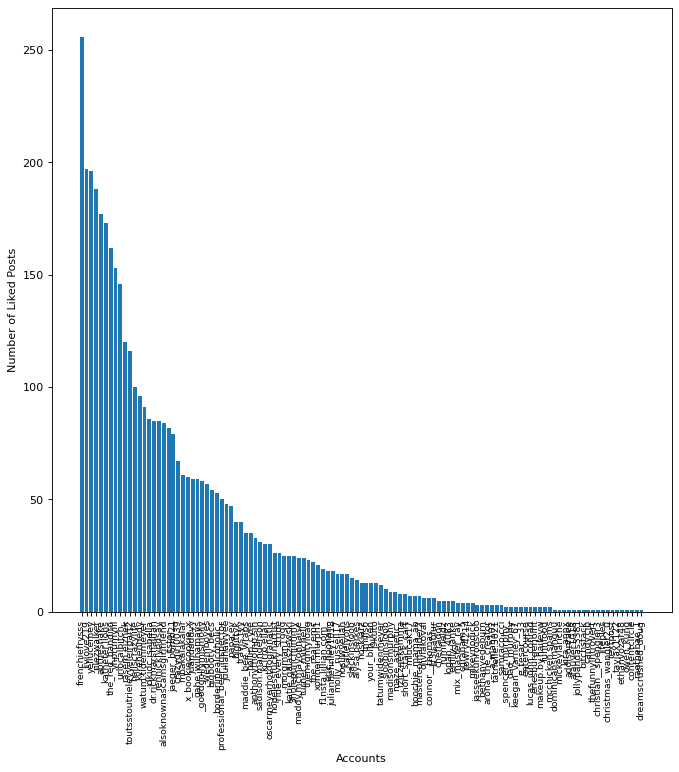

In [101]:
sortcount = count_data.sort_values('likes', ascending = False)
labels = sortcount['likes'].keys()
vals = sortcount['likes']
width = .75

fig, ax = plt.subplots(figsize = (10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels, vals)
ax.set_ylabel('Number of Liked Posts')
ax.set_xlabel('Accounts')
plt.xticks(rotation = 90, fontsize = 'small')
plt.show()

The pie chart below displays my data in a different format, but it essentially tells us the same thing. However, this chart does a better job at displaying the density distribution of my likes than the previous graph. We can begin to see here that many of the accounts that I follow only get a few likes from me, evident by the unintelligible jumble of profile names towards the bottom right of the chart. 

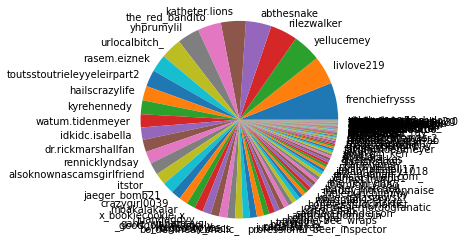

In [97]:
fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
plt.show()

Finally, this distribution plot below shows us what the pie chart hinted at above. It seems that about 67 or so accounts that I follow only get 1-20 likes from me. The cause of this probably being that these are accounts that I've just recently followed and, condsidering that I've been somewhat inactive on my account, the fact that no one is really getting likes from me these days.

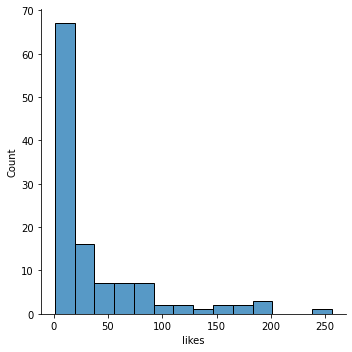

In [103]:
sns.displot(sortcount['likes'])
sortcount = sortcount.rename(columns = {'timestamp': 'Likes'})


### In Conclusion...

Through the manipulation of this data, we can see that I've liked about 4,235 posts on my Instagram account thus far, and that the majority of the people that I follow only get about 1-20 likes from me. We can see how many of my likes went to each specific profile along with which profile received the most likes from me. With the visualizations of the data we are able to tell a story that will show us why the data is the way it is. For example, there must be some reason why the profile "frenchiefrysss" is receiving the most likes from me more than any other account. One takeaway someone should be aware of is that visualizations like these can allow one to theorize reasons or explanations as to why a dataset looks the way it does, like what we did with my density distribution plot here. If only I used my old Instagram account which spanned a much longer period than my current one. I feel as if working with more data (in any case really) would lead to more diversified and intersting results. Unfortunately, I was locked out of my old account a long time ago.